<font color="DD740A">
<h1>Curso de Machine Learning con Python</h1> 
<h3>Tema7: Machine Learning con Python</h3>
<h4>Clustering y Reducción de Dimensiones (Ejercicio)</h4>
<br>
</font>    

*Autor: ITI*<br>
*Copyright 2020 Instituto Tecnológico de Informática (ITI). Prohibida la reproducción total o parcial sin permiso del ITI*

# Importar librerías

In [1]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings("ignore")

# Variables globales
BOLD = '\033[1m'
NO_BOLD = '\033[0m'

# Establecer el Datawarehouse 

<font color="Blue">
<h4>Visualizar el directorio actual</h4> 
</font>   

In [5]:
os.getcwd()

'C:\\Users\\aulafor'

<font color="Blue">
<h4>Establecer el Source Directory, para apuntar donde se encuentran los datos</h4> 
</font>   

In [6]:
cd Desktop/b/Data/

C:\Users\aulafor\Desktop\b\Data


<font color="Blue">
<h4>Identificar los ficheros del directorio indicado</h4> 
</font>   

# (III)  CLUSTERING

## EJERCICO: Clusterizar dataset IRIS

<i><b>Dataset: IRIS</b>
    
El conjunto de datos contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros. 
<br><br>
Variables: 5<br>
Observaciones: 150<br>
<br>   

Diccionario de datos:
<ul>
    <li>sepal.length: Longitud del sépalo</li> 
    <li>sepal.width: Anchura del sépalo
    <li>petal.length: Longitud del pétalo
    <li>petal.width: Anchura del pétalo
    <li>variety: Etiqueta de la variedad de planta   
</ul>
</i>

<font color="Blue">
<h4>Importar el dataset iris y visualizar las primeras filas</h4> 
</font>   

In [7]:
df_iris = pd.read_csv("iris.csv")

In [10]:
df_iris.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

## KMEANS

<font color="Blue">
<h4>Importar la librería</h4> 
</font>   

In [18]:
from sklearn.cluster import KMeans

#### Elbow Method para encontrar el número de clústers óptimo
<font color="Blue">
<h4> Indicar las features y el vector x</h4> 
</font>   

In [17]:
df_iris.iloc[:,0:variety]

NameError: name 'variety' is not defined

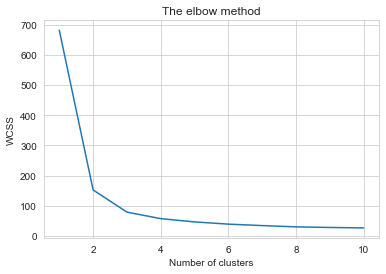

In [21]:
## Seleccionamos las variables independientes (features)

features = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
x = df_iris.loc[:,features]


## Buscamos el número de clústers óptimo probando de 1 a 11
## wcss: within cluster sum of errors. Sumatorio de la distancia de cada observación al centroide del clúster al que pertenece
## Cuanto menor sea el wcss, menor será el error y más compactos serán los clústers

wcss = [] 

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
## Visualizamos el gráfico del elbow
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

<i> (*) Puede ver claramente por qué se llama 'El método del codo' en el gráfico anterior, los grupos óptimos es donde ocurre el codo. Esto es cuando la suma de cuadrados dentro del clúster (WCSS) no disminuye significativamente con cada iteración.
    
Se puede observar que el número de clústers óptimo es 3

#### Entrenamiento del modelo
#### Creamos el objeto KMeans con k=3, lo entrenamos y predecimos el clúster de cada observación
<font color="Blue">
<h4> Indicar k óptimo, Crear objeto kmeans, Entrenar modelo kmeans</h4> 
</font>   

In [40]:
k = 3

kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0) 

y_kmeans = kmeans.fit_predict(x)   # fit_predict calcula los centros

<font color="Blue">
<h4> Mostrar los centros asignados por KMeans</h4> 
</font>   

In [41]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

<font color="Blue">
<h4> Observamos las etiquetas predecidas por KMeans</h4> 
</font>   

In [42]:
# Cluster 0 = Versicolor, Cluster 1 = Setosa, Cluster 2 = Virginica
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

#### Función para categorizar las etiquetas numéricas de KMeans (Ejecutar celda)

In [43]:
def categorize_kmeans(row):
    
    if    row['cluster_kmeans'] == 0:  val = 'Versicolor'
    elif  row['cluster_kmeans'] == 1:  val = 'Setosa'
    elif  row['cluster_kmeans'] == 2:  val = 'Virgínica'
    # elif  row['cluster_kmeans'] == 2:  val = 'La Otra'
    else: val = 'out'
        
    return val

#### Agregamos la columna de las etiquetas de los clústers predecidos por Kmeans al dataframe  (Ejecutar celda)

In [44]:
df_iris_clusterizado = df_iris.copy()
df_iris_clusterizado['cluster_kmeans'] = y_kmeans

#### Categorizamos los clústers de Kmeans  (Ejecutar celda)

In [45]:
df_iris_clusterizado['cluster_kmeans_cat'] = df_iris_clusterizado.apply(categorize_kmeans, axis=1)
df_iris_clusterizado

,sepal.length,sepal.width,petal.length,petal.width,variety,cluster_kmeans,cluster_kmeans_cat
0,5.1,3.5,1.4,0.2,Setosa,1,Setosa
1,4.9,3.0,1.4,0.2,Setosa,1,Setosa
2,4.7,3.2,1.3,0.2,Setosa,1,Setosa
3,4.6,3.1,1.5,0.2,Setosa,1,Setosa
4,5.0,3.6,1.4,0.2,Setosa,1,Setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,0,Versicolor
146,6.3,2.5,5.0,1.9,Virginica,2,Virgínica
147,6.5,3.0,5.2,2.0,Virginica,0,Versicolor
148,6.2,3.4,5.4,2.3,Virginica,0,Versicolor


#### Visualizamos mediante scatterplot los datos original vs las etiquetas asignadas  (Ejecutar celda)

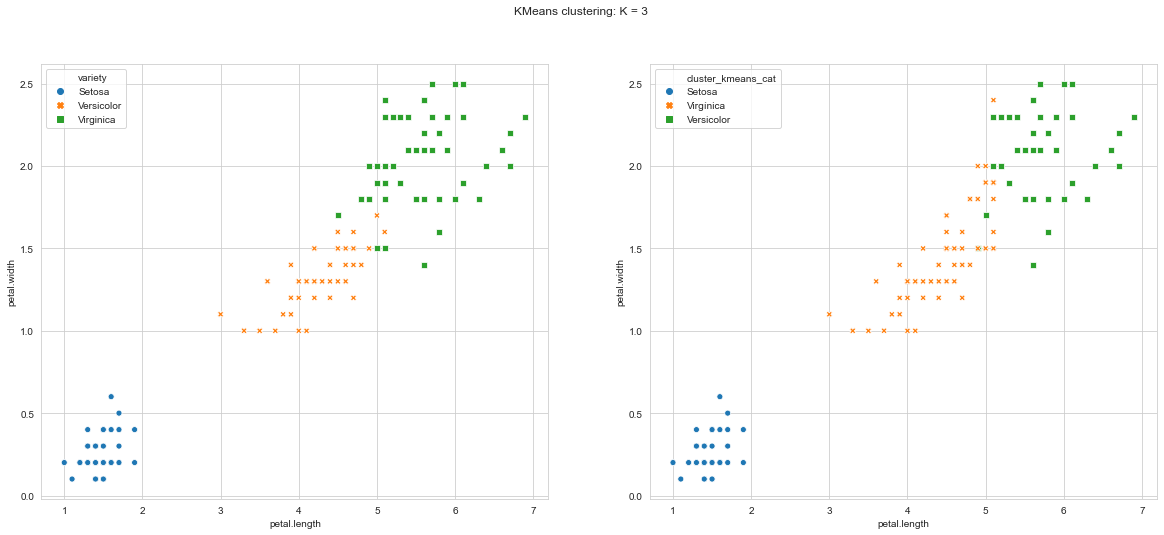

In [46]:
fig, ax = plt.subplots(1, 2, figsize = (20, 8))
fig.suptitle('KMeans clustering: K = 3')

sns.scatterplot(x="petal.length", y="petal.width", hue="variety",style="variety",data=df_iris_clusterizado, ax=ax[0])
sns.scatterplot(x="petal.length", y="petal.width", hue="cluster_kmeans_cat",style="cluster_kmeans_cat",data=df_iris_clusterizado, ax=ax[1])

#### Creamos el objeto KMeans con k=4, lo entrenamos y predecimos el clúster de cada observación
<font color="Blue">
<h4>Rellenar el hiperparámetro 'K', Crear el objweto KMeans, Entrenar/Predecir KMeans</h4> 
</font>   

In [ ]:
k = 

kmeans = 

y_kmeans = 


# Agregamos la columna de las etiquetas de los clústers predecidos por Kmeans al dataframe
df_iris_clusterizado = df_iris.copy()
df_iris_clusterizado['cluster_kmeans'] = y_kmeans

# Categorizamos los clústers de Kmeans
df_iris_clusterizado['cluster_kmeans_cat'] = df_iris_clusterizado.apply(categorize_kmeans, axis=1)

# Scatter plot
fig, ax = plt.subplots(1, 2, figsize = (20, 8))
fig.suptitle('KMeans clustering. K =2')

sns.scatterplot(x="petal.length", y="petal.width", hue="variety",style="variety",data=df_iris_clusterizado, ax=ax[0])
sns.scatterplot(x="petal.length", y="petal.width", hue="cluster_kmeans_cat",style="cluster_kmeans_cat",data=df_iris_clusterizado, ax=ax[1])

# (IV) REDUCCIÓN DE DIMENSIONES

#### Visualizamos los datos del dataset iris en 4D  (Ejecutar celda)

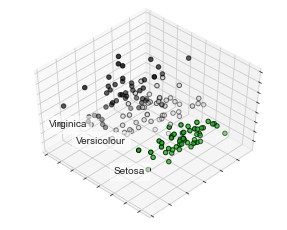

In [47]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

## PCA (Principal Components Analysis)

#### Estandarizar las variables (Ejecutar celda))

In [48]:
from sklearn.preprocessing import StandardScaler

x_std = StandardScaler().fit_transform(x)

<font color="Blue">
<h4>Importar la librería</h4> 
</font>   

In [49]:
from sklearn.decomposition import PCA

#### Entrenamiento del modelo
<font color="Blue">
<h4> Crear el objeto PCA con 2 componentes, Entrenar y transformar las componentes principales de la x_std</h4> 
</font>   

In [50]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x_std)


principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
target = 'variety'

finalDf = pd.concat([principalDf, df_iris[target]], axis = 1)


<font color="Blue">
<h4> Visualizar las primeras filas del dataframe finalDf</h4> 
</font>   

In [51]:
finalDf.head()

,principal component 1,principal component 2,variety
0,-2.264703,0.480027,Setosa
1,-2.080961,-0.674134,Setosa
2,-2.364229,-0.341908,Setosa
3,-2.299384,-0.597395,Setosa
4,-2.389842,0.646835,Setosa


#### Visualizar las dos PCs del PCA en 2D (Ejecutar celda)

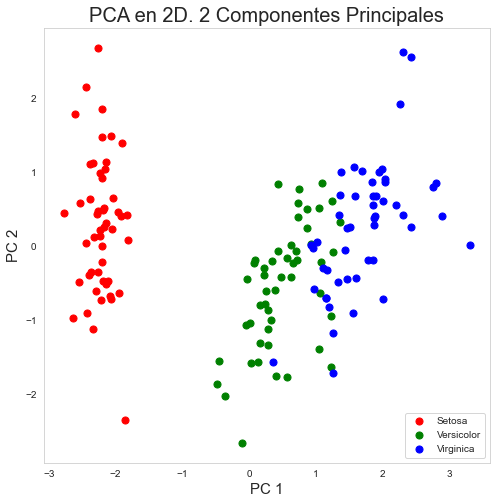

In [52]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('PCA en 2D. 2 Componentes Principales', fontsize = 20)
targets = ['Setosa', 'Versicolor', 'Virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['variety'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#### Mostrar la varianza explicada por las dos primeras PCs (Ejecutar celda)

In [56]:
print('Varianza Explicada de la PC1: %0.3f' % pca.explained_variance_ratio_[0])
print('Varianza Explicada de la PC2: %0.3f' % pca.explained_variance_ratio_[1])

var_total = pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]
print(BOLD + 'Varianza Explicada Total: %0.3f' % var_total +' \n'+ NO_BOLD)

SyntaxError: invalid syntax (<ipython-input-56-15dc8d79804c>, line 5)

# (V) DETECCIÓN DE ANOMALÍAS

#### Creación de los datos con anomalías aleatorias (Ejecutar celda)

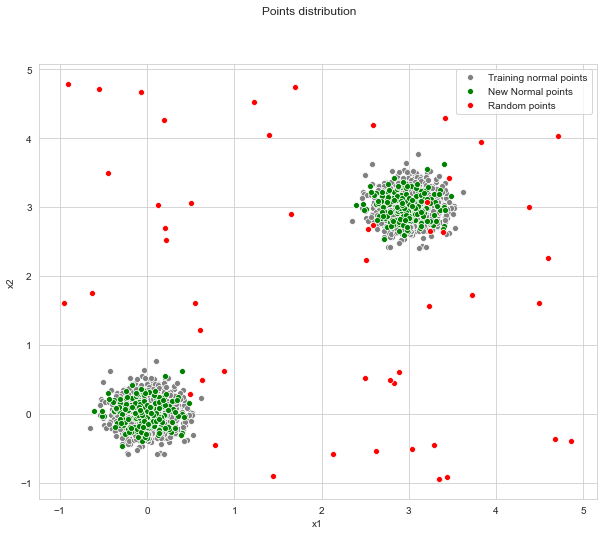

In [57]:
# Generar datos ----
rng = np.random.RandomState(42)

# Gerenar datos de entrenamiento
X_train = 0.2 * rng.randn(1000, 2)
X_train = np.r_[X_train + 3, X_train]
X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])

# Generar datos nuevos 'normales' 
X_test = 0.2 * rng.randn(200, 2)
X_test = np.r_[X_test + 3, X_test]
X_test = pd.DataFrame(X_test, columns = ['x1', 'x2'])

# Generar datos nuevos 'aleatorios' -- posibles outliers ----
X_random = rng.uniform(low=-1, high=5, size=(50, 2))
X_random = pd.DataFrame(X_random, columns = ['x1', 'x2'])

# Scatter plot
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
fig.suptitle('Points distribution')

sns.scatterplot(x="x1", y="x2", data=X_train, color='grey', label="Training normal points")
sns.scatterplot(x="x1", y="x2", data=X_test, color='green', label="New Normal points")
sns.scatterplot(x="x1", y="x2", data=X_random, color='red', label="Random points")



## Isolation Forest

<font color="Blue">
<h4>Importar la librería</h4> 
</font>   

In [58]:
from sklearn.ensemble import IsolationForest 

#### Entrenamiento del modelo
<font color="Blue">
<h4>Crear objeto clf y entrenar</h4> 
</font>   

In [80]:
# Contamination: cuanto de estricto es el modelo. Rango [0, 0.5]. por defecto = auto (0.1)
clf = IsolationForest(max_samples=100, random_state=rng, contamination=0.1)

clf.fit(X_train)

# predictions
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_random = clf.predict(X_random)

#### Analizar la precisión del modelo sobre las observaciones normales y aleatorias (Ejecutar celda)

In [81]:
# new, 'normal' observations ----
print("Accuracy on normal obs:", list(y_pred_test).count(1)/y_pred_test.shape[0])

# new random observation -- possible outliers ----
print("Accuracy on random obs:", list(y_pred_random).count(-1)/y_pred_random.shape[0])


Accuracy on normal obs: 0.91
Accuracy on random obs: 0.98


#### Añadir las etiquetas a los dataframes (Ejecutar celda)

In [82]:
df_train = X_train.copy(); df_train['outlier'] = y_pred_train
df_test = X_test.copy(); df_test['outlier'] = y_pred_test
df_random = X_random.copy(); df_random['outlier'] = y_pred_random

#### Visualizar las anomalías detectadas (Ejecutar celda)

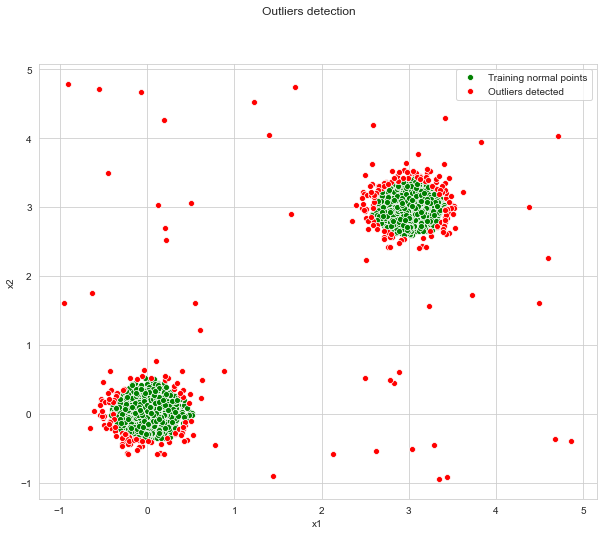

In [83]:
# Scatter plot de las predicciones
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
fig.suptitle('Outliers detection')

# Observaciones predecidas como normales
sns.scatterplot(x="x1", y="x2", data=df_train.loc[df_train['outlier'] == 1], color='green', label="Training normal points")
sns.scatterplot(x="x1", y="x2", data=df_test.loc[df_test['outlier'] == 1], color='green')
sns.scatterplot(x="x1", y="x2", data=df_random.loc[df_random['outlier'] == 1], color='green')

# Observaciones predecidas como outliers
sns.scatterplot(x="x1", y="x2", data=df_train.loc[df_train['outlier'] == -1], color='red', label="Outliers detected")
sns.scatterplot(x="x1", y="x2", data=df_test.loc[df_test['outlier'] == -1], color='red')
sns.scatterplot(x="x1", y="x2", data=df_random.loc[df_random['outlier'] == -1], color='red')
